# Final Project - LA crime data analysis (2020-present)
### By Team 3 - Rhyon Lu, Jin Chen, Judy Jiang, Joann Courtney, Kerin Wu, Blair Jiang

This analysis is based on the LA crime dataset form 2020 to 2023 October. The dataset contains informaion on time, place and type of the incident, crime detail description, victim information, weapon details and comments. Analyzing this dataset is essential for understanding trends and patterns in criminal activity in LA. Such datasets are valuable for law enforcement agencies, policymakers, researchers, and the public to make informed decisions about crime prevention and intervention strategies. 

Through an initial examination of crime types and weapons, our investigation delved into interesting findings within two distinct crime areas—LA Pacific and Motel. Additionally, we scrutinized the distribution patterns among victims to gain a comprehensive understanding and prediction of probability to be involved in severe crime. 

We provide summary of findings along with data analysis process where most evidence were found, and also conclude them in the final part with further explaination and suggestions.

Data source - URL: https://www.kaggle.com/datasets/qnqfbqfqo/crime-data-from-2020-to-present 

In [1]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit
%matplotlib inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
#import pydotplus
import matplotlib.pyplot as plt

In [3]:
import warnings
#suppress all future warning
warnings.filterwarnings('ignore')

# Dataset Description

## Main dataset: LA Crime data from 2020 to present

The data set contains 815,882 cases, with 28 columns of crime stats on time, place and type of the incident, crime detail description, victim information, weapon details and comments. Each row of the data refers to one single crime case.

<ul>
<li><b>"DR_NO"</b> This is a unique identifier for each crime report.</li>
<li><b>"Date Rptd"</b> The date when the crime was reported.</li>
<li><b>"DATE OCC"</b> The date when the crime occurred.</li>
<li><b>"TIME OCC"</b> The time when the crime occurred.</li>
<li><b>"AREA"</b> The code or identifier for the area where the crime occurred.</li>
<li><b>"AREA NAME"</b> The name of the area where the crime occurred.</li>
<li><b>"Rpt Dist"</b> No. of the reporting district number.</li>
<li><b>"Part 1-2"</b> A code indicating the type of crime (Part 1 or Part 2).</li>
<li><b>"Crm Cd"</b> The crime code associated with the incident.</li>
<li><b>"Crm Cd Desc"</b> A description of the crime.</li>
<li><b>"Mocodes"</b> Modus Operandi (Method of Operation) codes, describing how the crime was committed.</li>
<li><b>"Vict Age"</b> Age of the victim.</li>
<li><b>"Vict Sex"</b> Gender of the victim (F for female, M for male).</li>
<li><b>"Vict Descent"</b> Descent or ethnicity of the victim.</li>
<li><b>"Premis Cd"</b> Premise code for the location of the crime.</li>
<li><b>"Premis Desc"</b> A description of the premise where the crime occurred.</li>
<li><b>"Weapon Used"</b> Cd Code for the weapon used, if any</li>
<li><b>"Weapon Desc"</b> A description of the weapon used.</li>
<li><b>"Status"</b> The status of the case (e.g., AO for Adult Other, IC for Invest Cont).</li>
<li><b>"Status Desc"</b> A description of the case status.</li>
<li><b>"Crm Cd 1"</b> 1/2/3/4 Additional crime codes associated with the incident.</li>
<li><b>"LOCATION"</b> The specific location of the crime.</li>
<li><b>"Cross Street"</b> The name of the cross street at the crime location</li>
<li><b>"LAT"</b> Latitude coordinate of the crime location.</li>
<li><b>"LON"</b> Longitude coordinate of the crime location.</li>    
</ul>

## Supplement dataset: LA household income & population by zipcode

This data set contains hosehold income and population density for the 21 areas provided in previous crime dataset, and such information was further researched based on zipcode of those areas in the same time frame.

<ul>
<li><b>"area_name"</b> The name of the area where the crime occurred, aligned with previous dataset</li>
<li><b>"zipcode"</b> The zipcode of the area</li>
<li><b>"household_income"</b> The average household income of the area</li>
<li><b>"population_density"</b> The population density of the area</li>
<li><b>"crimes_per_area"</b> The crime case volume of the area</li>
</ul>

## Step 1: Import the dataset

### Import data crime.csv

In [4]:
df = pd.read_csv('Crime.csv')

In [5]:
# import extra dataset for household income
popdf = pd.read_csv('household_income_pop_LA.csv')

## Step 2: Data Clean-up

To work efficiently as a team, we only applied a few data cleaning process in general, and more steps were done seperately based on copies of dataframe in each sections upon specific needs. Before everything starts, we:

1. Changed all column names to lower case without spaces
2. Converted all date columns to datetime

In [6]:
#Overview of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
#Change column names in dataset.
df.columns=['dr_no','date_rptd','date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex',
            'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'crm_cd_2',
            'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon']
pd.options.display.max_columns = None

In [8]:
# Convert the date columns to datetime format
df["date_rptd"] = pd.to_datetime(df["date_rptd"]).dt.date
df["date_occ"] = pd.to_datetime(df["date_occ"]).dt.date

## Step 3: Data Analysis

### We explore the dataset from three aspects:

1. The Crime **Types**
2. The Crime **Location and Time**
3. Distribution on **Victms**

## P1. The Crime Types  

<ol>
<li>Overview</li>
<li>Common crime types</li>
<li>Famous crime scene</li>
<li>Common weapons used</li>
</ol>

#### Data Cleaning

In [9]:
#df.head(3)

In [10]:
#Make a copy of the dataset for part 1 exploration
#Drop the columns not needed
df1=df.copy().drop(columns = ['area','area_name','rpt_dist_no','mocodes','vict_age','vict_sex','vict_descent',
         'crm_cd_1','crm_cd_2','crm_cd_3','crm_cd_4','location','cross_street','lat','lon'])
#inplace=True)
#df1.head(3)

In [11]:
# Check for empty values
#df1.isnull().sum()

In [12]:
#Replace null in description columns with 'Unknown'
df1.premis_desc.fillna(value='Unknown',inplace=True)
df1.weapon_desc.fillna(value='Unknown',inplace=True)
n = df1.isna().sum()

### Overview

In [13]:
#Check the most recent crime date
print("The first crime report date: " + str(df1.date_rptd.min()))
print("The first crime occurred date: " + str(df1.date_occ.min()))
print("Most recent crime report date: " + str(df1.date_rptd.max()))
print("Most recent crime occurred date: " + str(df1.date_occ.max()))

The first crime report date: 2020-01-01
The first crime occurred date: 2020-01-01
Most recent crime report date: 2023-10-09
Most recent crime occurred date: 2023-10-09


Hence, this is a crime dataset from 2020/1/1 till 2023/10/9

In [14]:
#How long it takes for case to be reported after occurred
time_taken = df1['date_rptd']-df1['date_occ']
time_taken.mean()

Timedelta('10 days 11:43:24.985524867')

### What crime types happen the most?

In [15]:
#How many crime types in total
crmtype_ttl = df1["crm_cd_desc"].nunique()
crm_counts = df1["crm_cd_desc"].value_counts()
#What's the mean of cases by crime types
crmtype_avg = int(crm_counts.mean())
print("Total types of crime: " + str(crmtype_ttl) +
      "\nThe mean of case number by crime types: " + str(crmtype_avg))

Total types of crime: 138
The mean of case number by crime types: 5912


In [16]:
#What crime types happen the most (top 10)
crm_counts.nlargest(10)

VEHICLE - STOLEN                                           87356
BATTERY - SIMPLE ASSAULT                                   64943
THEFT OF IDENTITY                                          51724
BURGLARY FROM VEHICLE                                      49996
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    49753
BURGLARY                                                   49658
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             46986
THEFT PLAIN - PETTY ($950 & UNDER)                         41463
INTIMATE PARTNER - SIMPLE ASSAULT                          41142
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            31537
Name: crm_cd_desc, dtype: int64

In [17]:
#Count how many crime types are above the mean
crm_counts_abavg = (crm_counts > crmtype_avg).sum()
#Get a subset focusing on a partial crime types
crm_types_abavg = crm_counts[crm_counts > crmtype_avg].index.tolist()
df1_smaller = df1[df1['crm_cd_desc'].isin(crm_types_abavg)]
print("There are " + str(crm_counts_abavg) + " types of crime with case number above mean.")

There are 22 types of crime with case number above mean.


<Axes: xlabel='count', ylabel='crm_cd_desc'>

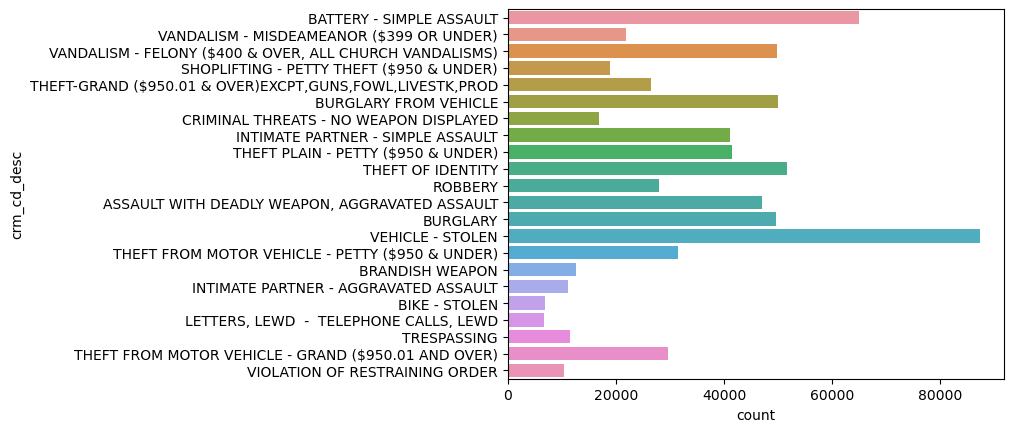

In [18]:
#Plot histogram for crime types with cases over 5912
sns.countplot(y='crm_cd_desc', data=df1_smaller)

### What are the famous crime scenes?

In [19]:
#Famous crime scenes - most happened (top 10)
crmscene_counts=df1['premis_desc'].value_counts()
crmscene_counts.nlargest(10)

STREET                                          206321
SINGLE FAMILY DWELLING                          138351
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    100291
PARKING LOT                                      57248
OTHER BUSINESS                                   38303
SIDEWALK                                         35182
VEHICLE, PASSENGER/TRUCK                         24215
GARAGE/CARPORT                                   16109
DRIVEWAY                                         13368
RESTAURANT/FAST FOOD                             10398
Name: premis_desc, dtype: int64

### What weapons were most common used?

In [20]:
#Most common weapon used
weapon_counts=df1["weapon_desc"].value_counts()
weapon_counts.nlargest(10)

Unknown                                           531448
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    152422
UNKNOWN WEAPON/OTHER WEAPON                        30128
VERBAL THREAT                                      20859
HAND GUN                                           17607
SEMI-AUTOMATIC PISTOL                               6410
KNIFE WITH BLADE 6INCHES OR LESS                    6014
UNKNOWN FIREARM                                     5777
OTHER KNIFE                                         5142
MACE/PEPPER SPRAY                                   3231
Name: weapon_desc, dtype: int64

### Is there any interesting weapon?

In [21]:
#Gun related?
df1[df1.weapon_desc.str.contains('GUN')].groupby("weapon_desc").dr_no.count().sort_values(ascending = False)
print("Toy Gun were used "+ str(df1[df1.weapon_desc == 'TOY GUN'].weapon_desc.count()) +" times")

weapon_desc
HAND GUN                            17607
AIR PISTOL/REVOLVER/RIFLE/BB GUN     1657
SIMULATED GUN                        1074
STUN GUN                              356
SHOTGUN                               278
TOY GUN                               144
SAWED OFF RIFLE/SHOTGUN                26
AUTOMATIC WEAPON/SUB-MACHINE GUN       23
Name: dr_no, dtype: int64

Toy Gun were used 144 times


What kind of crime was committed by toy guns/bottle/pepper spray?

In [22]:
#Crimes using toy guns
df1_smaller[df1_smaller.weapon_desc == 'TOY GUN'].groupby("crm_cd_desc").crm_cd_desc.count().nlargest(3)
#Crimes using bottle
df1_smaller[df1_smaller.weapon_desc == 'BOTTLE'].groupby("crm_cd_desc").crm_cd_desc.count().nlargest(3)
#Crimes using pepper spray
df1_smaller[df1_smaller.weapon_desc == 'MACE/PEPPER SPRAY'].groupby("crm_cd_desc").crm_cd_desc.count().nlargest(3)

crm_cd_desc
BRANDISH WEAPON                                   46
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    20
ROBBERY                                           19
Name: crm_cd_desc, dtype: int64

crm_cd_desc
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    1301
INTIMATE PARTNER - AGGRAVATED ASSAULT              233
ROBBERY                                            127
Name: crm_cd_desc, dtype: int64

crm_cd_desc
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    2396
ROBBERY                                            424
INTIMATE PARTNER - AGGRAVATED ASSAULT              221
Name: crm_cd_desc, dtype: int64

## P2.  The Crime Locations & Time

<ol>
<li>Overview</li>
<li>Household Income and Crime Type Correlations</li>
<li>Crimes in Pacific</li>
<li> Household Income and Crime Location Correlations</li>
<li>Crimes in Motel</li>
<li>Human Trafficking</li>
</ol>

#### Data Cleaning

In [23]:
popdf

,area_name,zipcode,household_income,population_density,crimes_per_area
0,77th Street,90003,31900,19770,51553
1,Central,90014,23600,25390,54841
2,Devonshire,91324,63400,6760,33128
3,Foothill,91331,53700,11470,27225
4,Harbor,90731,48700,6630,33790
5,Hollenbeck,90033,29500,15050,30650
6,Hollywood,90028,35700,20420,43268
7,Mission,91345,65800,5790,32469
8,N Hollywood,91601,50300,14840,40520
9,Newton,90011,31700,24440,40859


In [24]:
## clean the data
df2 = df.copy()
#popdf.rename(columns={'area':'area_name'},inplace=True)
df2['area_name'] = df2['area_name'].str.lower()
popdf['area_name'] = popdf['area_name'].str.lower()
popdf['area_name'] = popdf['area_name'].str.replace(' ','')
df2['area_name']=df2['area_name'].str.replace(' ', '')

In [25]:
pd.set_option('display.max_rows',15)

### Overview
<ul>
<li>People with higher household income prefer to live in which area? </li>
<li>How about people with less household income</li>
<li>What's the distribution of crime number and area</li>

In [26]:
## Reasearch part: Find most frequently crime type in each area (when doing the research)
## what is the number of each crime type happened in each area

crm_cd_desc_count = df2.groupby('area_name')['crm_cd_desc'].value_counts().reset_index(name = 'count')
# crm_cd_desc_count[crm_cd_desc_count['count'] >= 3000]
df_merge1 = pd.merge(crm_cd_desc_count, popdf, on='area_name', how='left').set_index('area_name') 


## what are the most frequently happened crime type?
df2.groupby('crm_cd_desc')['crm_cd_desc'].count().nlargest(20)
df2.groupby('crm_cd_desc')['crm_cd_desc'].count().nsmallest(50)

crm_cd_desc
VEHICLE - STOLEN                                           87356
BATTERY - SIMPLE ASSAULT                                   64943
THEFT OF IDENTITY                                          51724
BURGLARY FROM VEHICLE                                      49996
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    49753
                                                           ...  
CRIMINAL THREATS - NO WEAPON DISPLAYED                     16919
BRANDISH WEAPON                                            12697
TRESPASSING                                                11415
INTIMATE PARTNER - AGGRAVATED ASSAULT                      11118
VIOLATION OF RESTRAINING ORDER                             10385
Name: crm_cd_desc, Length: 20, dtype: int64

crm_cd_desc
INCITING A RIOT                               1
DISHONEST EMPLOYEE ATTEMPTED THEFT            2
FAILURE TO DISPERSE                           3
FIREARMS RESTRAINING ORDER (FIREARMS RO)      4
BIGAMY                                        5
                                           ... 
CREDIT CARDS, FRAUD USE ($950.01 & OVER)    102
COUNTERFEIT                                 108
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)    114
BOAT - STOLEN                               115
PANDERING                                   116
Name: crm_cd_desc, Length: 50, dtype: int64

<Axes: ylabel='area_name'>

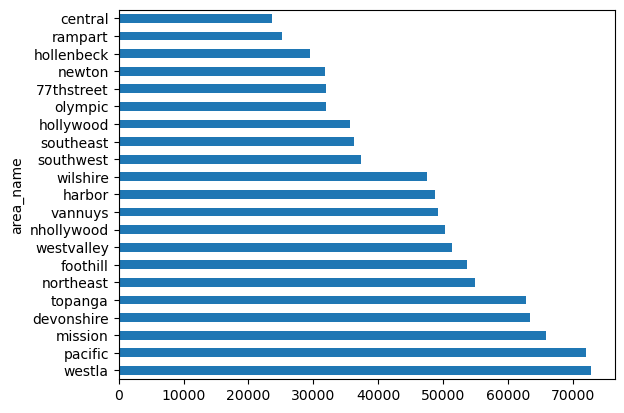

In [27]:
## what's the distribution of the household income in each area?
popdf.groupby('area_name')['household_income'].mean().sort_values(ascending = False).plot(kind = 'barh')

<Axes: ylabel='area_name'>

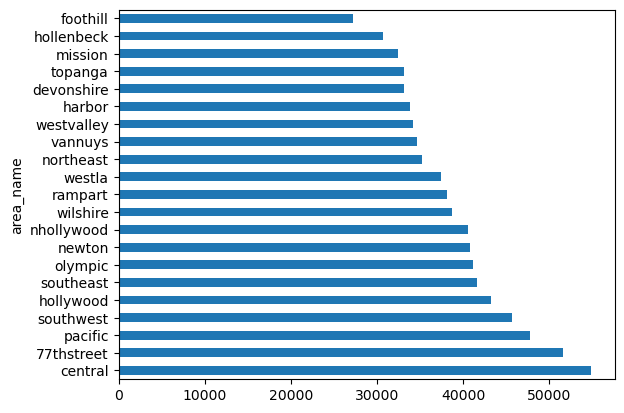

In [28]:
## what's the distribution of the crime number in each area?
popdf.groupby('area_name')['crimes_per_area'].mean().sort_values(ascending = False).plot(kind = 'barh')

### Household income and crime type correlation

In [29]:
## calculate the correlation between each type of crime and household income.

def calculate_correlations(df):
    correlations = {}

    for x in df['crm_cd_desc'].unique():
        df_test = df[df['crm_cd_desc'] == x]
        cor_test = df_test[['household_income', 'count']].corr()
        correlations[x] = cor_test.loc['household_income', 'count']

    return correlations

#calculate_correlations(df_merge1)
pd.set_option('display.max_rows',None)
correlation_series = pd.Series(calculate_correlations(df_merge1))

correlation_series[correlation_series <1].nlargest(8)
correlation_series[correlation_series <1].nsmallest(8)

INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)           0.794699
DOCUMENT FORGERY / STOLEN FELONY                       0.751040
DRUGS, TO A MINOR                                      0.665754
DISHONEST EMPLOYEE - PETTY THEFT                       0.652296
BUNCO, GRAND THEFT                                     0.640881
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)    0.633295
BURGLARY                                               0.577660
UNAUTHORIZED COMPUTER ACCESS                           0.553842
dtype: float64

FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)   -0.957084
BIKE - ATTEMPTED STOLEN                              -0.832429
ATTEMPTED ROBBERY                                    -0.785689
BRANDISH WEAPON                                      -0.769665
BATTERY - SIMPLE ASSAULT                             -0.741006
ROBBERY                                              -0.733435
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       -0.730306
ARSON                                                -0.664684
dtype: float64

In [30]:
len(df2[df2['crm_cd_desc'] == 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'])
len(df2[df2['crm_cd_desc'] == 'DOCUMENT FORGERY / STOLEN FELONY'])
len(df2[df2['crm_cd_desc'] == 'DRUGS, TO A MINOR'])
len(df2[df2['crm_cd_desc'] == 'DISHONEST EMPLOYEE - PETTY THEFT'])
len(df2[df2['crm_cd_desc'] == 'BURGLARY'])

5

2835

10

20

49658

**Though most of crime tend to occure more frequently in poorer area, especially with weapons, some are positively related with household income.**
<ol>
<li>BURGLARY (57.76%)</li>
<li>THEFT FROM MOTOR VEHICLE; THEFT FROM MOTOR VEHICLE-ATTEMPT(46.55%): richer family more likely to own a motor.</li>
<li>BUNCO, GRAND THEFT(64.08%)</li>
</ol>

### Crimes in Pacific

### Summary of the finding:

Some of the crime types are positively correlated with household income. The correlation between burglary and household income is 57.7%. Take the Pacific as an example of an area with higher household income, burglaries mostly occurred between 12.00-13.00 (24%), and only 47% of burglaries were reported on the same day during the time when they got home from work.

In [31]:
df2a = df2.merge(popdf, how='left', left_on='area_name', right_on='area_name')
agebins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
timebins = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400]
df2a['vict_age_bins'] = pd.cut(df2.vict_age, bins=agebins)
df2a['time_occ_bins'] = pd.cut(df2.time_occ, bins=timebins)
df2a.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,zipcode,household_income,population_density,crimes_per_area,vict_age_bins,time_occ_bins
0,10304468,2020-01-08,2020-01-08,2230,3,southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,90062,37300,17420,45689,"(30.0, 40.0]","(2200, 2400]"
1,190101086,2020-01-02,2020-01-01,330,1,central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,90014,23600,25390,54841,"(20.0, 30.0]","(200, 400]"
2,200110444,2020-04-14,2020-02-13,1200,1,central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,90014,23600,25390,54841,NaN,"(1000, 1200]"
3,191501505,2020-01-01,2020-01-01,1730,15,nhollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,91601,50300,14840,40520,"(70.0, 80.0]","(1600, 1800]"
4,191921269,2020-01-01,2020-01-01,415,19,mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,91345,65800,5790,32469,"(30.0, 40.0]","(400, 600]"


In [32]:
#What do the home burglaries which aren't reported on the same day look like?

df2a[(df2a.area_name=='pacific')&(df2a.crm_cd_desc=='BURGLARY')&(df2a.date_rptd!=df2a.date_occ)&
   ((df2a.premis_desc=='SINGLE FAMILY DWELLING')|(df2a.premis_desc=='MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))].head(10)

#Some people don't report burglaries that happened at their homes for days, even months, from the occurrence date.
#We can assume that a fair amount of these people (53%) must not have immediately noticed that their homes have been burglarized.

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,zipcode,household_income,population_density,crimes_per_area,vict_age_bins,time_occ_bins
13924,201420102,2020-11-11,2020-11-09,1100,14,pacific,1464,1,310,BURGLARY,1501,43,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,310.0,NaN,NaN,NaN,5800 W SEAGLASS CIR,NaN,33.9740,-118.4199,90066,72000,12040,47754,"(40.0, 50.0]","(1000, 1200]"
106823,211418799,2021-09-22,2020-04-23,2030,14,pacific,1454,1,310,BURGLARY,0344,39,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,310.0,998.0,NaN,NaN,13400 MAXELLA AV,NaN,33.9870,-118.4407,90066,72000,12040,47754,"(30.0, 40.0]","(2000, 2200]"
107152,201409999,2020-04-23,2020-04-22,1830,14,pacific,1414,1,310,BURGLARY,1609 0344,56,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,310.0,NaN,NaN,NaN,200 RUTH AV,NaN,34.0011,-118.4728,90066,72000,12040,47754,"(50.0, 60.0]","(1800, 2000]"
107499,201405494,2020-01-26,2020-01-25,1400,14,pacific,1466,1,310,BURGLARY,0344,40,M,O,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,7200 MCCOOL AV,NaN,33.9784,-118.4004,90066,72000,12040,47754,"(30.0, 40.0]","(1200, 1400]"
108283,201414184,2020-07-22,2020-07-17,630,14,pacific,1464,1,310,BURGLARY,0344 0397,68,M,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,5900 PLAYA VISTA DR,NaN,33.9720,-118.4271,90066,72000,12040,47754,"(60.0, 70.0]","(600, 800]"
108658,201416659,2020-09-04,2020-08-30,522,14,pacific,1413,1,310,BURGLARY,1606 0344,42,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,200 5TH AV,NaN,33.9983,-118.4746,90066,72000,12040,47754,"(40.0, 50.0]","(400, 600]"
108807,201412571,2020-06-19,2020-06-16,1930,14,pacific,1441,1,310,BURGLARY,1307 0344 1601,30,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,2400 WILSON AV,NaN,33.9865,-118.4579,90066,72000,12040,47754,"(20.0, 30.0]","(1800, 2000]"
109304,201420969,2020-11-30,2020-11-28,1530,14,pacific,1455,1,310,BURGLARY,0344,39,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,12700 ADMIRAL AV,NaN,33.9876,-118.4261,90066,72000,12040,47754,"(30.0, 40.0]","(1400, 1600]"
109415,201412182,2020-06-11,2020-06-07,200,14,pacific,1453,1,310,BURGLARY,0344,0,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,310.0,NaN,NaN,NaN,4200 DEL REY AV,NaN,33.9870,-118.4437,90066,72000,12040,47754,NaN,"(0, 200]"
109449,201413576,2020-07-10,2020-07-09,2300,14,pacific,1441,1,310,BURGLARY,0344 1606 0314,20,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,310.0,NaN,NaN,NaN,2400 PACIFIC AV,NaN,33.9834,-118.4688,90066,72000,12040,47754,"(10.0, 20.0]","(2200, 2400]"


In [33]:
#Find the top twelve areas with high crime per area.

df2a.groupby('area_name')['crimes_per_area'].mean().sort_values(ascending=False).head(12)

area_name
central       54841.0
77thstreet    51553.0
pacific       47754.0
southwest     45689.0
hollywood     43268.0
southeast     41620.0
olympic       41148.0
newton        40859.0
nhollywood    40520.0
wilshire      38685.0
rampart       38159.0
westla        37426.0
Name: crimes_per_area, dtype: float64

In [34]:
#Does the list above coincide with the top twelve in population density?
#Find the top twelve areas with the highest population density.

df2a.groupby('area_name')['population_density'].mean().sort_values(ascending=False).head(12)

#Ten of the top twelve areas with high crime are also in the top twelve of population density.
#Pacific and Southeast are the only two with higher crime and lower population density. 

area_name
rampart       35480.0
olympic       31890.0
central       25390.0
newton        24440.0
hollywood     20420.0
77thstreet    19770.0
westla        18110.0
wilshire      17630.0
southwest     17420.0
hollenbeck    15050.0
nhollywood    14840.0
westvalley    12210.0
Name: population_density, dtype: float64

In [35]:
#Find most common types of crime in Pacific and Southeast as opposed to Central and 77th Street.
#Central and 77th Street were chosen as they are the two areas with the highest amounts of crime.

df2[df2.area_name=='pacific'].groupby('area_name')['crm_cd_desc'].value_counts().head()
df2[df2.area_name=='southeast'].groupby('area_name')['crm_cd_desc'].value_counts().head()
df2[df2.area_name=='central'].groupby('area_name')['crm_cd_desc'].value_counts().head()
df2[df2.area_name=='77thstreet'].groupby('area_name')['crm_cd_desc'].value_counts().head()

#(1)
#Pacific is an anomaly, exhibiting high crime rates with high household income and lower population density.
#Interestingly, Pacific is also the only area above to exhibit BURGLARY as a top crime type.
#Why does Pacific exhibit high crime, when their population density is low and household income is high?

#(2)
#Central has the highest amount of crimes committed, and the third highest population density. 
#77th Street has the second highest amount of crimes committed, and the sixth highest population density.
#The most common crime in Central is BURGLARY FROM VEHICLE, and BATTERY - SIMPLE ASSAULT.
#How much higher are the numbers for top crimes in the most crime-ridden areas?


#We can reason that there are more burglaries in Pacific because there is more to gain by robbing higher income houses.
#Let's find out if Pacific, with its low population density and high household income, has more home burglaries.


area_name  crm_cd_desc                       
pacific    VEHICLE - STOLEN                      5010
           BURGLARY                              3794
           THEFT PLAIN - PETTY ($950 & UNDER)    3712
           BURGLARY FROM VEHICLE                 3126
           BATTERY - SIMPLE ASSAULT              2856
Name: crm_cd_desc, dtype: int64

area_name  crm_cd_desc                                   
southeast  VEHICLE - STOLEN                                  5593
           ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    4228
           THEFT OF IDENTITY                                 3347
           BATTERY - SIMPLE ASSAULT                          3331
           INTIMATE PARTNER - SIMPLE ASSAULT                 2935
Name: crm_cd_desc, dtype: int64

area_name  crm_cd_desc                                            
central    BURGLARY FROM VEHICLE                                      7610
           BATTERY - SIMPLE ASSAULT                                   6001
           VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    3841
           ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             3608
           VEHICLE - STOLEN                                           3548
Name: crm_cd_desc, dtype: int64

area_name   crm_cd_desc                                   
77thstreet  VEHICLE - STOLEN                                  6700
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    5145
            BATTERY - SIMPLE ASSAULT                          3984
            THEFT OF IDENTITY                                 3774
            INTIMATE PARTNER - SIMPLE ASSAULT                 3551
Name: crm_cd_desc, dtype: int64

1. Pacific is an anomaly, exhibiting high crime rates with high household income and lower population density.
<li>Interestingly, Pacific is also the only area above to exhibit BURGLARY as a top crime type.</li>
<li>Why does Pacific exhibit high crime, when their population density is low and household income is high?
</li>



2. Central has the highest amount of crimes committed, and the third highest population density. 
<li>77th Street has the second highest amount of crimes committed, and the sixth highest population density.</li>
<li>The most common crime in Central is BURGLARY FROM VEHICLE, and BATTERY - SIMPLE ASSAULT.
</li>
<li>How much higher are the numbers for top crimes in the most crime-ridden areas?</li>


**We can reason that there are more burglaries in Pacific because there is more to gain by robbing higher income houses.

#### Let's find out if Pacific, with its low population density and high household income, has more home burglaries.


In [36]:
#Confirm the highest amount of the burglaries in Pacific are happening at homes.

df2a[(df2a.area_name=='pacific')&(df2a.crm_cd_desc=='BURGLARY')].groupby('area_name')['premis_desc'].value_counts().head(10)

#By far, the highest amount of burglaries are happening at homes and apartments in the Pacific.
#Single family homes are also most likely to be owned by higher income individuals.

area_name  premis_desc                                 
pacific    SINGLE FAMILY DWELLING                          1256
           MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     568
           GARAGE/CARPORT                                   510
           OTHER BUSINESS                                   333
           PUBLIC STORAGE                                   183
           OTHER PREMISE                                    149
           RESTAURANT/FAST FOOD                             127
           HOTEL                                             76
           STORAGE SHED                                      74
           PARKING LOT                                       40
Name: premis_desc, dtype: int64

In [37]:
#Confirm that Pacific is one of the areas most at risk for home burglaries overall.

df2a[(df2a.crm_cd_desc=='BURGLARY')&((df2a.premis_desc=='SINGLE FAMILY DWELLING')|(df2a.premis_desc=='MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))].groupby('area_name')[('household_income', 'population_density')].value_counts().sort_values(ascending=False).head(10)

#Pacific is indeed the second highest on the chart of areas at risk for home burglaries.
#The only area with more home burglaries is West LA, which is also the only area with a higher household income than Pacific.

area_name   household_income  population_density
westla      72700             18110                 2164
pacific     72000             12040                 1824
westvalley  51300             12210                 1668
olympic     32000             31890                 1516
devonshire  63400             6760                  1466
wilshire    47500             17630                 1448
nhollywood  50300             14840                 1320
topanga     62700             5620                  1281
hollywood   35700             20420                 1177
77thstreet  31900             19770                 1101
dtype: int64

#### Do the home burglaries in Pacific occur at a certain time of day?

1. Pacific is the area with the second highest household income in Los Angeles city.
2. We can assume people living there tend to have professional jobs.
3. The burglaries are reported when people arrive home for lunch (12:00-13:00), come home from work (17:00-18:00), or leave for work (8:00).


In [38]:
#Do the home burglaries in Pacific occur at a certain time of day?

df2a[(df2a.area_name=='pacific')&(df2a.crm_cd_desc=='BURGLARY')&((df2a.premis_desc=='SINGLE FAMILY DWELLING')|(df2a.premis_desc=='MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))].groupby('area_name')['time_occ'].value_counts().head()

#Pacific is the area with the second highest household income in Los Angeles city.
#We can assume people living there tend to have professional jobs.
#The burglaries are reported when people arrive home for lunch (12:00-13:00), come home from work (17:00-18:00), or leave for work (8:00).

area_name  time_occ
pacific    1200        66
           1800        59
           800         52
           1700        50
           1300        45
Name: time_occ, dtype: int64

#### What do the home burglaries which aren't reported on the same day look like? 

1. Some people don't report burglaries that happened at their homes for days, even months, from the occurrence date.
2. We can assume that a fair amount of these people (53%) must not have immediately noticed that their homes have been burglarized.

In [39]:
#What do the home burglaries which aren't reported on the same day look like?

df2a[(df2a.area_name=='pacific')&(df2a.crm_cd_desc=='BURGLARY')&(df2a.date_rptd!=df2a.date_occ)&
   ((df2a.premis_desc=='SINGLE FAMILY DWELLING')|(df2a.premis_desc=='MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))].head(10)

#Some people don't report burglaries that happened at their homes for days, even months, from the occurrence date.
#We can assume that a fair amount of these people (53%) must not have immediately noticed that their homes have been burglarized.

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,zipcode,household_income,population_density,crimes_per_area,vict_age_bins,time_occ_bins
13924,201420102,2020-11-11,2020-11-09,1100,14,pacific,1464,1,310,BURGLARY,1501,43,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,310.0,NaN,NaN,NaN,5800 W SEAGLASS CIR,NaN,33.9740,-118.4199,90066,72000,12040,47754,"(40.0, 50.0]","(1000, 1200]"
106823,211418799,2021-09-22,2020-04-23,2030,14,pacific,1454,1,310,BURGLARY,0344,39,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,310.0,998.0,NaN,NaN,13400 MAXELLA AV,NaN,33.9870,-118.4407,90066,72000,12040,47754,"(30.0, 40.0]","(2000, 2200]"
107152,201409999,2020-04-23,2020-04-22,1830,14,pacific,1414,1,310,BURGLARY,1609 0344,56,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,310.0,NaN,NaN,NaN,200 RUTH AV,NaN,34.0011,-118.4728,90066,72000,12040,47754,"(50.0, 60.0]","(1800, 2000]"
107499,201405494,2020-01-26,2020-01-25,1400,14,pacific,1466,1,310,BURGLARY,0344,40,M,O,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,7200 MCCOOL AV,NaN,33.9784,-118.4004,90066,72000,12040,47754,"(30.0, 40.0]","(1200, 1400]"
108283,201414184,2020-07-22,2020-07-17,630,14,pacific,1464,1,310,BURGLARY,0344 0397,68,M,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,5900 PLAYA VISTA DR,NaN,33.9720,-118.4271,90066,72000,12040,47754,"(60.0, 70.0]","(600, 800]"
108658,201416659,2020-09-04,2020-08-30,522,14,pacific,1413,1,310,BURGLARY,1606 0344,42,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,200 5TH AV,NaN,33.9983,-118.4746,90066,72000,12040,47754,"(40.0, 50.0]","(400, 600]"
108807,201412571,2020-06-19,2020-06-16,1930,14,pacific,1441,1,310,BURGLARY,1307 0344 1601,30,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,2400 WILSON AV,NaN,33.9865,-118.4579,90066,72000,12040,47754,"(20.0, 30.0]","(1800, 2000]"
109304,201420969,2020-11-30,2020-11-28,1530,14,pacific,1455,1,310,BURGLARY,0344,39,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,310.0,NaN,NaN,NaN,12700 ADMIRAL AV,NaN,33.9876,-118.4261,90066,72000,12040,47754,"(30.0, 40.0]","(1400, 1600]"
109415,201412182,2020-06-11,2020-06-07,200,14,pacific,1453,1,310,BURGLARY,0344,0,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,310.0,NaN,NaN,NaN,4200 DEL REY AV,NaN,33.9870,-118.4437,90066,72000,12040,47754,NaN,"(0, 200]"
109449,201413576,2020-07-10,2020-07-09,2300,14,pacific,1441,1,310,BURGLARY,0344 1606 0314,20,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,310.0,NaN,NaN,NaN,2400 PACIFIC AV,NaN,33.9834,-118.4688,90066,72000,12040,47754,"(10.0, 20.0]","(2200, 2400]"


#### What percentage of the home burglaries in Pacific get reported on the same day where the burglary is committed?

In [40]:
#What percentage of the home burglaries in Pacific get reported on the same day where the burglary is committed?

df2a[(df2a.area_name=='pacific')&(df2a.crm_cd_desc=='BURGLARY')&(df2a.date_rptd==df2a.date_occ)&((df2a.premis_desc=='SINGLE FAMILY DWELLING')|(df2a.premis_desc=='MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))]['date_rptd'].count()/df2a[(df2a.area_name=='pacific')&(df2a.crm_cd_desc=='BURGLARY')&((df2.premis_desc=='SINGLE FAMILY DWELLING')|(df2a.premis_desc=='MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)'))]['date_rptd'].count()

#Of the home burglaries in Pacific, 47% are reported on the same day.


0.4769736842105263

### Household Income and Crime Location Correlations

In [41]:
### check the location where crime mostly happened

pd.set_option('display.max_rows',20)
premis_desc_count = df2.groupby('area_name')['premis_desc'].value_counts().reset_index(name = 'count')
df_merge2 = pd.merge(premis_desc_count,popdf,on ='area_name', how = 'left')

df2.groupby('premis_desc')['premis_desc'].count().nlargest(10)
df2.groupby('premis_desc')['premis_desc'].count()

premis_desc
STREET                                          206321
SINGLE FAMILY DWELLING                          138351
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    100291
PARKING LOT                                      57248
OTHER BUSINESS                                   38303
SIDEWALK                                         35182
VEHICLE, PASSENGER/TRUCK                         24215
GARAGE/CARPORT                                   16109
DRIVEWAY                                         13368
RESTAURANT/FAST FOOD                             10398
Name: premis_desc, dtype: int64

premis_desc
7TH AND METRO CENTER (NOT LINE SPECIFIC)     189
ABANDONED BUILDING ABANDONED HOUSE           793
ABATEMENT LOCATION                            10
ABORTION CLINIC/ABORTION FACILITY*             6
AIRCRAFT                                      26
                                            ... 
VISION CARE FACILITY*                         66
WAREHOUSE                                   1586
WATER FACILITY                                26
WEBSITE                                      586
YARD (RESIDENTIAL/BUSINESS)                 5105
Name: premis_desc, Length: 306, dtype: int64

In [42]:
premis_desc_count[premis_desc_count['count'] > 1200]

## It's interesting that in central area, the distribution of location of crimes isn’t  similar to the whole
## Crimes are more frequently happened in MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)/PARKING LOT, SIDE WALK, rather than single familyhouse
## This may contributed to the city structure of central area, which is more busy and commercialized, and also more homeless.

,area_name,premis_desc,count
0,77thstreet,STREET,17508
1,77thstreet,SINGLE FAMILY DWELLING,14231
2,77thstreet,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",4126
3,77thstreet,SIDEWALK,2362
4,77thstreet,PARKING LOT,2210
...,...,...,...
3475,wilshire,SINGLE FAMILY DWELLING,6762
3476,wilshire,OTHER BUSINESS,4315
3477,wilshire,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",4103
3478,wilshire,PARKING LOT,1811


In [43]:
### define the correlation between crime location and household income


def calculate_loc_correlations(df):
    correlations = {}

    for x in df['premis_desc'].unique():
        df_test = df[df['premis_desc'] == x]
        cor_test = df_test[['household_income', 'count']].corr()
        correlations[x] = cor_test.loc['household_income', 'count']

    return correlations

pd.set_option('display.max_rows',None)
correlation_loc = pd.Series(calculate_loc_correlations(df_merge2))
correlation_loc[correlation_loc < 1].nlargest(10)
correlation_loc[correlation_loc > -1].nsmallest(10)

correlation_loc['MOTEL']
### Findings

### Crime Location for area with lower household income: STREET,SIDEWALK,VEHICLE, PASSENGER/TRUCK,BUS STOP
### Crime Location for area with higher household income:BEACH,DRIVEWAY, PUBILIC STORAGE

## interesting: there's nealy no correlation between motel and crime location. Motel itself would be dangerous no matter where it located

MUSCLE BEACH                       0.999998
MTA - RED LINE - VERMONT/SUNSET    0.941887
TOOL SHED*                         0.841882
CONDOMINIUM/TOWNHOUSE              0.742033
DRIVEWAY                           0.691198
PUBLIC STORAGE                     0.678485
COLISEUM                           0.585007
PORCH, RESIDENTIAL                 0.577192
BEACH                              0.538569
HOSPICE                            0.534744
dtype: float64

MTA - BLUE LINE - GRAND/LATTC                    -0.967627
LA UNION STATION (NOT LINE SPECIFIC)             -0.957291
MTA - BLUE LINE - PICO                           -0.769523
HOCKEY RINK/ICE HOCKEY                           -0.769158
THE BEVERLY CONNECTION                           -0.723567
BUS STOP                                         -0.700936
MTA BUS                                          -0.684715
STREET                                           -0.657723
RETIRED (DUPLICATE) DO NOT USE THIS CODE         -0.650129
TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)   -0.642630
dtype: float64

-0.16969630046423964

1. Crime Location for area with lower household income: STREET,SIDEWALK,VEHICLE, PASSENGER/TRUCK,BUS STOP
2. Crime Location for area with higher household income:BEACH, DRIVEWAY, PUBILIC STORAGE

interesting: there's nealy no correlation between motel and crime location. Motel itself would be dangerous no matter where it located


### Crimes in Motel

### Summary of the finding:

When considering the location and household income, it’s interesting that the correlation between motel and household income is only -17%. It seems no matter where the motel is, it is dangerous by itself.

In [44]:
#Where is the most physical abuse happening in LA?

df[(df.crm_cd_desc=='INTIMATE PARTNER - SIMPLE ASSAULT')&((df.area_name=='77th Street')|(df.area_name=='Southeast')|(df.area_name=='Southwest'))].groupby('premis_desc')['premis_desc'].count().nlargest(10)

#Most abuse happens at home and apartments, as expected.
#But why is abuse happening at motels?

premis_desc
SINGLE FAMILY DWELLING                          4101
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    1938
STREET                                          1491
SIDEWALK                                         399
PARKING LOT                                      226
VEHICLE, PASSENGER/TRUCK                         147
MOTEL                                            139
ALLEY                                             77
DRIVEWAY                                          62
OTHER BUSINESS                                    46
Name: premis_desc, dtype: int64

In [45]:
#Interestingly and sadly, some physical abuse happens at motels.

premis_desc_count[premis_desc_count['premis_desc'] == 'MOTEL'].count


#Are there particular motels that have high incidences of physical abuse happening within them?

df2a[(df2a.crm_cd_desc.str.contains('ASSAULT'))&(df2a.premis_desc=='MOTEL')].groupby('location')['location'].count().nlargest(10)

#The location of 4100 S Western Avenue has over double the incidences of the motel that is next in the list.
#Looking up this address, we find that the place is called Mustang Motel, and it is a rentable by the hour love motel.

<bound method DataFrame.count of        area_name premis_desc  count
12    77thstreet       MOTEL    357
249      central       MOTEL     23
437   devonshire       MOTEL     26
593     foothill       MOTEL     45
738       harbor       MOTEL    100
942   hollenbeck       MOTEL     26
1090   hollywood       MOTEL    106
1243     mission       MOTEL    292
1441      newton       MOTEL     54
1630  nhollywood       MOTEL     53
1808   northeast       MOTEL     49
1989     olympic       MOTEL     54
2190     pacific       MOTEL     20
2338     rampart       MOTEL     80
2485   southeast       MOTEL    283
2658   southwest       MOTEL    183
2852     topanga       MOTEL     64
3001     vannuys       MOTEL     98
3192      westla       MOTEL     29
3354  westvalley       MOTEL     29
3523    wilshire       MOTEL     59>

location
4100 S  WESTERN                      AV     35
10300 S  BROADWAY                           17
9100 N  SEPULVEDA                    BL     17
12700    ENCINITAS                    AV    15
8400 N  SEPULVEDA                    BL     14
15700    ROSCOE                       BL    13
10900 S  BROADWAY                           11
3800 S  WESTERN                      AV     11
5600 S  WESTERN                      AV     11
7100 S  VERMONT                      AV     11
Name: location, dtype: int64

1. The location of 4100 S Western Avenue has over double the incidences of the motel that is next in the list.
2. Looking up this address, we find that the place is called Mustang Motel, and it is a rentable by the hour love motel.


#### Who is reporting abuse at the love motel?
Again, most are young Hispanic and Black women between the ages of 20 and 30.

In [46]:
#Who is reporting abuse at the love motel?

df2a[(df2a.crm_cd_desc.str.contains('ASSAULT'))&(df2a.premis_desc=='MOTEL')&(df2a.location.str.contains('4100 S  WESTERN'))].groupby(['vict_sex', 'vict_descent', 'vict_age_bins'])['vict_age_bins'].count().nlargest(5)

#Again, most are young Hispanic and Black women between the ages of 20 and 30.

vict_sex  vict_descent  vict_age_bins
F         B             (20, 30]         8
          H             (20, 30]         7
          B             (30, 40]         5
          H             (30, 40]         3
          B             (10, 20]         2
Name: vict_age_bins, dtype: int64

#### Does the abuse at the love motel happen at a particular time?
1. Most of the incidents happen in the dead of night, between 12:00 AM and 2:00 AM, and the morning, between 6:00 AM and 10:00 AM.
2. A surprising amount occur around noon.

In [47]:
#Does the abuse at the love motel happen at a particular time?

df2a[(df2a.crm_cd_desc.str.contains('ASSAULT'))&(df2a.premis_desc=='MOTEL')&(df2a.location.str.contains('4100 S  WESTERN'))].groupby('time_occ_bins')['time_occ_bins'].count().nlargest(5)

#Most of the incidents happen in the dead of night, between 12:00 AM and 2:00 AM, and the morning, between 6:00 AM and 10:00 AM.
#A surprising amount occur around noon.

time_occ_bins
(0, 200]        8
(1200, 1400]    5
(600, 800]      3
(800, 1000]     3
(1400, 1600]    3
Name: time_occ_bins, dtype: int64

#### What else happens at the love motel?

In addition to the physical abuse by partners, there are also incidents of robbery, burglary, and **human trafficking!**

In [48]:
#What else happens at the love motel?

df2a[((df2a.area_name=='77thstreet')|(df2a.area_name=='southeast')|(df2a.area_name=='southwest'))&(df2a.premis_desc=='MOTEL')&(df2.location.str.contains('4100 S  WESTERN'))].groupby('crm_cd_desc')['crm_cd_desc'].count().sort_values(ascending=False).head(10)

#In addition to the physical abuse by partners, there are also incidents of robbery, burglary, and human trafficking!

crm_cd_desc
INTIMATE PARTNER - SIMPLE ASSAULT                           17
ROBBERY                                                     10
BATTERY - SIMPLE ASSAULT                                     9
THEFT PLAIN - PETTY ($950 & UNDER)                           6
BURGLARY                                                     6
HUMAN TRAFFICKING - COMMERCIAL SEX ACTS                      5
INTIMATE PARTNER - AGGRAVATED ASSAULT                        4
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               4
KIDNAPPING                                                   2
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     2
Name: crm_cd_desc, dtype: int64

#### Who is being robbed at the love motel?
Mostly older men between the ages of 30 and 50.

In [49]:
#Who is being robbed at the love motel?

df2a[((df2a.crm_cd_desc=='ROBBERY')|(df2a.crm_cd_desc=='BURGLARY')|(df2a.crm_cd_desc.str.contains('THEFT')))&((df2a.area_name=='77th Street')|(df.area_name=='Southeast')|(df.area_name=='Southwest'))&(df2a.premis_desc=='MOTEL')&(df2a.location.str.contains('4100 S  WESTERN'))].groupby('vict_sex')['vict_sex'].count().nlargest(2)
df2a[((df2a.crm_cd_desc=='ROBBERY')|(df2a.crm_cd_desc=='BURGLARY')|(df2a.crm_cd_desc.str.contains('THEFT')))&((df2a.area_name=='77th Street')|(df.area_name=='Southeast')|(df.area_name=='Southwest'))&(df2a.premis_desc=='MOTEL')&(df2a.location.str.contains('4100 S  WESTERN'))].groupby('vict_age_bins')['vict_age_bins'].count().nlargest(5)

#Mostly older men between the ages of 30 and 50.

vict_sex
M    14
F     7
Name: vict_sex, dtype: int64

vict_age_bins
(30, 40]    6
(40, 50]    5
(20, 30]    4
(60, 70]    4
(50, 60]    2
Name: vict_age_bins, dtype: int64

#### Do the robberies at the love motel happen at a particular time?
Most robberies happen in the dead of night, between 10:00 PM and 6:00 AM.

In [50]:
#Do the robberies at the love motel happen at a particular time?

df2a[((df2a.crm_cd_desc=='ROBBERY')|(df2a.crm_cd_desc=='BURGLARY')|(df2a.crm_cd_desc.str.contains('THEFT')))&(df2a.premis_desc=='MOTEL')&(df2a.location.str.contains('4100 S  WESTERN'))].groupby('time_occ_bins')['time_occ_bins'].count().nlargest(5)

#Most robberies happen in the dead of night, between 10:00 PM and 6:00 AM.

time_occ_bins
(0, 200]        4
(1000, 1200]    4
(200, 400]      3
(400, 600]      3
(2200, 2400]    3
Name: time_occ_bins, dtype: int64

#### Which areas of LA have the highest rates of human trafficking?

In [51]:
#Find the areas with the most reports of human trafficking.

df2a[df2a.crm_cd_desc.str.contains('TRAFFICKING')].groupby('area_name')['area_name'].count().nlargest(10)

#77th Street and Southeast are particularly bad.

area_name
77thstreet    233
southeast      82
vannuys        32
southwest      24
olympic        22
hollywood      21
pacific         9
central         8
newton          7
topanga         7
Name: area_name, dtype: int64

In [52]:
#Are there locations in these districts that are hotspots for human trafficking?

df2a[(df2a.crm_cd_desc.str.contains('HUMAN TRAFFICKING'))&((df2a.area_name=='77thstreet')|(df2a.area_name=='southeast'))].groupby('location')['location'].count().nlargest(10)

#Figueroa St. pops up as a clear winner. Upon researching why, we find that The Figueroa Corridor, 
#also known as 'the track,' is the most notorious human trafficking & sex trafficking corridor in the United States.

location
FIGUEROA                     ST    65
FIGUEROA                           26
69TH                         ST    15
70TH                         ST    12
68TH                         ST    11
65TH                         ST     9
66TH                         ST     7
73RD                         ST     7
83RD                         ST     6
102ND                        ST     5
Name: location, dtype: int64

## P3. Distribution of Victims

<ol>
<li>Which race group and age group hold the highest count of victims?</li>
<li>Age vs Gender in victims; Age vs Race in victims</li>
<li>Victim Gender vs Assault with Deadly Weapon</li>
<li>Victim Race vs Burglary</li>
<li>Prediction: Based on victims' age, sex and descent, how likely they would be involved in severe/Part 1 crimes?</li>
</ol>


#### Data Cleaning

In [53]:
df3 = df.copy()
df3.describe()
# check for empty values
df3.isnull().sum()

,dr_no,time_occ,area,rpt_dist_no,part_1_2,crm_cd,vict_age,premis_cd,weapon_used_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,lat,lon
count,8.158820e+05,815882.000000,815882.000000,815882.000000,815882.000000,815882.000000,815882.000000,815873.000000,284434.000000,815872.000000,60117.000000,2013.000000,59.000000,815882.000000,815882.000000
mean,2.160434e+08,1335.614658,10.711521,1117.576886,1.413928,500.777800,29.818963,305.776683,362.906165,500.515309,957.447245,983.647293,990.627119,33.800054,-117.404189
std,1.080151e+07,654.102822,6.092813,609.276287,0.492536,207.816937,21.772828,216.646998,123.759695,207.605385,111.527047,52.758676,28.131402,3.042256,10.560763
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.101222e+08,900.000000,6.000000,621.000000,1.000000,331.000000,8.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.011700,-118.429100
50%,2.201145e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.057900,-118.320500
75%,2.219155e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.162900,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


dr_no                  0
date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
part_1_2               0
crm_cd                 0
crm_cd_desc            0
mocodes           112762
vict_age               0
vict_sex          107192
vict_descent      107200
premis_cd              9
premis_desc          480
weapon_used_cd    531448
weapon_desc       531448
status                 0
status_desc            0
crm_cd_1              10
crm_cd_2          755765
crm_cd_3          813869
crm_cd_4          815823
location               0
cross_street      685361
lat                    0
lon                    0
dtype: int64

In [54]:
# check for nan
df3.vict_descent.isna().any()
df3.vict_sex.isna().any()
df3.vict_age.isna().any()

True

True

False

In [55]:
# check for unique values and how many
df3.vict_descent.unique()
df3.vict_sex.unique()
df3.vict_age.unique()

df3.vict_descent.nunique()
df3.vict_sex.nunique()
df3.vict_age.nunique()

array(['B', 'H', 'X', 'W', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'Z',
       'J', 'P', 'S', 'G', 'U', 'D', 'L', '-'], dtype=object)

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

array([ 36,  25,   0,  76,  31,  23,  29,  35,  41,  24,  34,  46,  66,
        40,  27,  62,  43,  71,  50,  19,  51,  33,  69,  39,  57,  78,
        52,  38,  55,  44,  18,  54,  22,  28,  42,  56,  67,  37,  60,
        61,  59,  32,  30,  45,  20,  15,  58,  47,  48,  26,  21,  64,
        75,  12,  49,  68,  14,  13,  10,  53,  74,  65,  63,   8,  16,
        72,  70,   9,  17,  90,  85,  81,  79,  94,  73,  11,  80,   5,
        82,   2,  77,  84,  88,  96,  99,  86,   7,  92,   3,  83,  87,
         6,  -1,  89,   4,  93,  98,  91,  95,  -2,  97, 120,  -3])

20

5

103

Cleanup for the race, gender and age columns

In [56]:
# for 'Vict Descent' column, replace everything except 'B', 'W', 'H' and 'A' with the letter 'O'
# B: Black or African American, W: White, H: Hispanic or Latino, A: Asian, O: Other
def categorized_descent(descent):
    if descent in ['B', 'W', 'H', 'A']:
        return descent
    else:
        return 'O'
df3['vict_descent'] = df3['vict_descent'].apply(categorized_descent)

# use .apply function instead of inplace=True in this case
# counting the number of occurrences in each racial category
descent_counts = df3['vict_descent'].value_counts()
descent_counts

O    264813
H    250450
W    166398
B    116358
A     17863
Name: vict_descent, dtype: int64

### Summary of the finding:

Victims who are identified with gender X at younger age 0-18 and females aged 19-35 are more vurnerable and targeted to be involved in crime, while the Asian ethnic category consistently represents a minority among victims.  A basic model to predict how likely victims would be involved in severe/Part 1 crimes based on their age, sex and descent was created and reached recall score 81%, AUC score 70%

([<matplotlib.patches.Wedge at 0x2a3d64e10>,
 [Text(-1.0657792602947587, 0.2722399095018166, 'Black or African American (B)'),
  Text(-0.7352930723407074, -0.8181345230264784, 'White (W)'),
  Text(0.842866712716661, -0.7068066953518549, 'Hispanic or Latino (H)'),
  Text(1.0387324853712665, 0.36198732551628365, 'Asian (A)'),
  Text(0.16112951904665215, 1.0881347701878636, 'Other (O)')],
 [Text(-0.5813341419789592, 0.14849449609189994, '14.3%'),
  Text(-0.4010689485494767, -0.4462551943780791, '20.4%'),
  Text(0.4597454796636332, -0.3855309247373754, '30.7%'),
  Text(0.5665813556570544, 0.19744763209979105, '2.2%'),
  Text(0.08788882857090118, 0.5935280564661073, '32.5%')])

Text(0.5, 1.0, 'Distribution of Different Ethnicity Categories in Vict Descent Column')

(-1.099998923977801,
 1.099998383657664,
 -1.0999995660705453,
 1.0999987309587944)

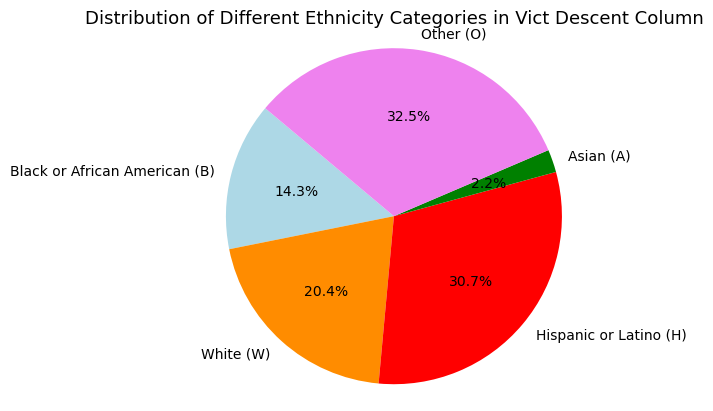

In [57]:
# pie chart illustration
descent_counts = descent_counts.reindex(['B', 'W', 'H', 'A', 'O'])
labels = ['Black or African American (B)', 'White (W)', 'Hispanic or Latino (H)', 'Asian (A)', 'Other (O)']
colors = ['lightblue', 'darkorange', 'red', 'green', 'violet']
plt.pie(descent_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Different Ethnicity Categories in Vict Descent Column', fontsize=13)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The data indicates that within the four major racial groups, Hispanic or Latino (H) holds the highest count of victims.

In [58]:
# for 'vict_sex' column, replace nan, 'H', '-' with 'others'
df3['vict_sex'].fillna('others', inplace=True)
df3['vict_sex'].replace({'H': 'others', '-': 'others'}, inplace=True)

"Sex X" means a gender that is not exclusively male nor female. "Others" is NAN or unreported.

In [59]:
# for 'vict_age' column, replace any negative number with number '0'
df3.loc[df3['vict_age'] < 0, 'vict_age'] = 0

In [60]:
# define the bins for age groups
bins = [0, 18, 35, 55, float('inf')]  # the last bin goes up to infinity for ages 56 and above
labels = ['0-18', '19-35', '36-55', '56+']

# categorize 'vict_age' into age groups
df3['vict_age_group'] = pd.cut(df3['vict_age'], bins=bins, labels=labels, right=False)

In [61]:
vict_age_group_counts = df3.groupby('vict_age_group').size()
print(vict_age_group_counts)

vict_age_group
0-18     222778
19-35    249055
36-55    230255
56+      113794
dtype: int64


<Axes: >

<Axes: >

Text(0.5, 0, 'Counts')

Text(0, 0.5, 'Age Groups')

Text(0.5, 1.0, 'Counts of Different Age Groups')

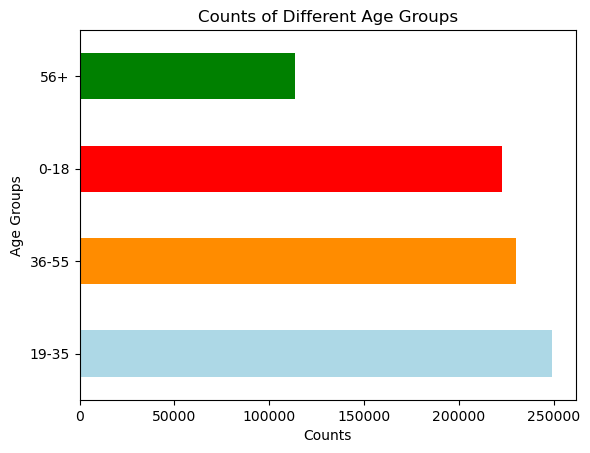

In [62]:
age_group_counts = df3['vict_age_group'].value_counts()

# Plotting the counts of different age groups
age_group_counts.plot(kind='barh')
age_group_counts.plot(kind='barh', color=colors)
plt.xlabel('Counts')
plt.ylabel('Age Groups')
plt.title('Counts of Different Age Groups')
plt.show()

The age bracket spanning from 19 to 35 records the highest number of victims.

#### Victim Sex vs Assault with Deadly Weapon

In [63]:
assault_with_weapon = df3[df3['crm_cd_desc'].str.contains('ASSAULT WITH DEADLY WEAPON')]
# analyze the relationship between victim sex and assault with deadly weapon
victim_sex_distribution = assault_with_weapon['vict_sex'].value_counts()
print(victim_sex_distribution)

M         34158
F         12613
X          1178
others       33
Name: vict_sex, dtype: int64


<Axes: >

Text(0.5, 1.0, 'Distribution of Victim Sex in Assault with Deadly Weapon Cases')

Text(0.5, 0, 'Victim Sex')

Text(0, 0.5, 'Count')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'X'), Text(3, 0, 'others')])

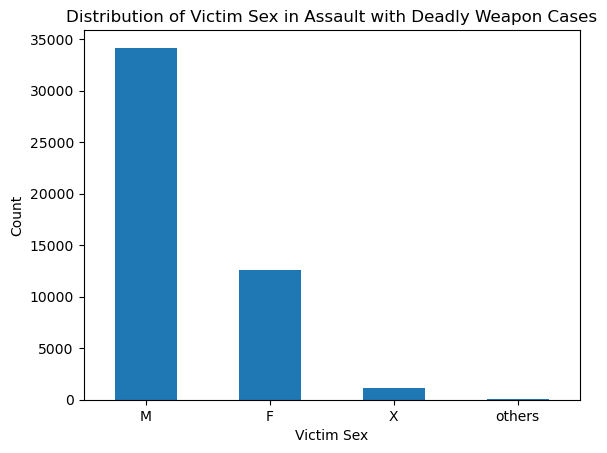

In [64]:
victim_sex_distribution.plot(kind='bar')
plt.title('Distribution of Victim Sex in Assault with Deadly Weapon Cases')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The count of males affected by assault with deadly weapons significantly exceeds that of females or X.

#### Victim Descent vs Burglary

In [65]:
burglary = df3[df3['crm_cd_desc'].str.contains('BURGLARY')]
# analyze the relationship between victim descent and burglary
victim_descent_distribution = burglary['vict_descent'].value_counts()
print(victim_descent_distribution)

W    32690
O    31185
H    23626
B    11931
A     4233
Name: vict_descent, dtype: int64


<Axes: >

Text(0.5, 1.0, 'Distribution of Victim Descent in Burglary Cases')

Text(0.5, 0, 'Victim Descent')

Text(0, 0.5, 'Count')

Text(0.95, 0.95, 'B: Black or African American\nW: White\nH: Hispanic or Latino\nA: Asian\nO: Other')

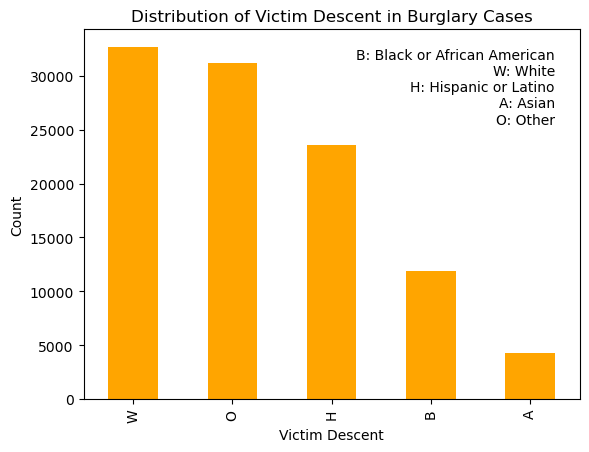

In [66]:
victim_descent_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Victim Descent in Burglary Cases')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.text(0.95, 0.95, 'B: Black or African American\nW: White\nH: Hispanic or Latino\nA: Asian\nO: Other', ha='right', va='top', transform=plt.gca().transAxes)
# for better readability, adding description of intials
plt.show()

Whites (W) have higher reported cases in burglary incidents, while Asians have the fewest reports.

One thing we notice that, according to U.S. Census Bureau, Hispanic or Latino individuals make up about 47%, White individuals represent about 29%, Asians make up about 11%, and Black or African American individuals account for 8%. However, Asians, who are around 12%, have the lowest burglary rates. But Black people, at 8%, face higher burglary rates compared to Asians.

#### Look at the relation between Age and Sex

In [67]:
df3 = pd.get_dummies(df3, columns=['vict_sex', 'vict_descent'])
df3.head()
df3.groupby(['vict_age_group']).\
    agg({'vict_sex_F': 'sum', 'vict_sex_M': 'sum', 'vict_sex_X': 'sum', 'vict_sex_others': 'sum'}).reset_index()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,vict_age_group,vict_sex_F,vict_sex_M,vict_sex_X,vict_sex_others,vict_descent_A,vict_descent_B,vict_descent_H,vict_descent_O,vict_descent_W
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,36-55,1,0,0,0,0,1,0,0,0
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,19-35,0,1,0,0,0,0,1,0,0
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,0-18,0,0,1,0,0,0,0,1,0
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,56+,1,0,0,0,0,0,0,0,1
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,409.0,BEAUTY SUPPLY STORE,NaN,NaN,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,19-35,0,0,1,0,0,0,0,1,0


,vict_age_group,vict_sex_F,vict_sex_M,vict_sex_X,vict_sex_others
0,0-18,15920,35949,63742,107167
1,19-35,127359,115211,6426,59
2,36-55,106978,122668,570,39
3,56+,50345,63222,209,18


In [68]:
# group by vict_age_group and aggregate the sum for each gender category
aggregated_age_sex_data = df3.groupby(['vict_age_group']).agg({
    'vict_sex_F': 'sum',
    'vict_sex_M': 'sum',
    'vict_sex_X': 'sum',
    'vict_sex_others': 'sum'
}).reset_index()

# calculate total for each age group
aggregated_age_sex_data['total'] = aggregated_age_sex_data['vict_sex_F'] + aggregated_age_sex_data['vict_sex_M'] + aggregated_age_sex_data['vict_sex_X'] + aggregated_age_sex_data['vict_sex_others']
# calculate percentages for each gender category
aggregated_age_sex_data['vict_sex_F_percent'] = (aggregated_age_sex_data['vict_sex_F'] / aggregated_age_sex_data['total']) * 100
aggregated_age_sex_data['vict_sex_M_percent'] = (aggregated_age_sex_data['vict_sex_M'] / aggregated_age_sex_data['total']) * 100
aggregated_age_sex_data['vict_sex_X_percent'] = (aggregated_age_sex_data['vict_sex_X'] / aggregated_age_sex_data['total']) * 100
aggregated_age_sex_data['vict_sex_others_percent'] = (aggregated_age_sex_data['vict_sex_others'] / aggregated_age_sex_data['total']) * 100

print(aggregated_age_sex_data)

  vict_age_group  vict_sex_F  vict_sex_M  vict_sex_X  vict_sex_others   total  \
0           0-18       15920       35949       63742           107167  222778   
1          19-35      127359      115211        6426               59  249055   
2          36-55      106978      122668         570               39  230255   
3            56+       50345       63222         209               18  113794   

   vict_sex_F_percent  vict_sex_M_percent  vict_sex_X_percent  \
0            7.146128           16.136692           28.612341   
1           51.136897           46.259260            2.580153   
2           46.460663           53.274847            0.247552   
3           44.242227           55.558290            0.183665   

   vict_sex_others_percent  
0                48.104840  
1                 0.023690  
2                 0.016938  
3                 0.015818  


<Axes: >

Text(0.5, 0, 'Age Group')

([<matplotlib.axis.XTick at 0x2a41ecdd0>,
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-35'),
  Text(2, 0, '36-55'),
  Text(3, 0, '56+')])

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Percentage of Sex Categories within Age Groups')

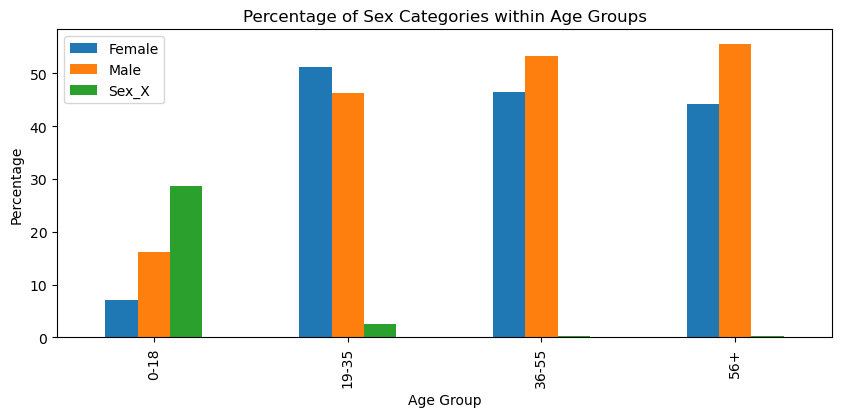

In [69]:
# plot only the percentages of sex categories within age groups as a bar chart; excluding "others" in the chart.
aggregated_age_sex_data[['vict_sex_F_percent', 'vict_sex_M_percent', 'vict_sex_X_percent']].plot(kind='bar',
                                                                                                      figsize=(10, 4))
plt.xlabel('Age Group')
plt.xticks(range(len(aggregated_age_sex_data)), labels)  # set custom labels on the x-axis
plt.ylabel('Percentage')
plt.title('Percentage of Sex Categories within Age Groups')
plt.legend(['Female', 'Male', 'Sex_X'])
plt.show()

- The percentage of victims classified under gender 'X' is highest in the youngest age group (0-18) and diminishes significantly as age increases. 
- Females constitute the majority of victims within the 19-35 age group, indicating a potential vulnerability or targeted nature of certain crimes towards this demographic.

#### Look at the relation between Age and Race

In [70]:
df3.groupby(['vict_age_group']).\
    agg({'vict_descent_A': 'sum', 'vict_descent_B': 'sum', 'vict_descent_H': 'sum', 'vict_descent_O': 'sum', 'vict_descent_W': 'sum'}).reset_index()

,vict_age_group,vict_descent_A,vict_descent_B,vict_descent_H,vict_descent_O,vict_descent_W
0,0-18,532,5459,18362,184527,13898
1,19-35,6777,48168,107180,33894,53036
2,36-55,6183,40402,93278,31534,58858
3,56+,4371,22329,31630,14858,40606


In [71]:
# group by vict_age_group and aggregate the sum for each descent category
aggregated_age_descent_data = df3.groupby(['vict_age_group']).agg({
    'vict_descent_A': 'sum',
    'vict_descent_B': 'sum',
    'vict_descent_H': 'sum',
    'vict_descent_O': 'sum',
    'vict_descent_W': 'sum'
}).reset_index()

# calculate total for each age group
aggregated_age_descent_data['total'] = aggregated_age_descent_data[
    ['vict_descent_A', 'vict_descent_B', 'vict_descent_H', 'vict_descent_O', 'vict_descent_W']
].sum(axis=1)

# calculate percentages for each descent category
for column in ['vict_descent_A', 'vict_descent_B', 'vict_descent_H', 'vict_descent_O', 'vict_descent_W']:
    percentage_column_name = f'{column}_percent'
    aggregated_age_descent_data[percentage_column_name] = (
        aggregated_age_descent_data[column] / aggregated_age_descent_data['total'] * 100
    )

print(aggregated_age_descent_data)

  vict_age_group  vict_descent_A  vict_descent_B  vict_descent_H  \
0           0-18             532            5459           18362   
1          19-35            6777           48168          107180   
2          36-55            6183           40402           93278   
3            56+            4371           22329           31630   

   vict_descent_O  vict_descent_W   total  vict_descent_A_percent  \
0          184527           13898  222778                0.238803   
1           33894           53036  249055                2.721086   
2           31534           58858  230255                2.685284   
3           14858           40606  113794                3.841152   

   vict_descent_B_percent  vict_descent_H_percent  vict_descent_O_percent  \
0                2.450421                8.242286               82.829992   
1               19.340306               43.034671               13.609042   
2               17.546633               40.510738               13.695251   
3    

<Axes: >

Text(0.5, 0, 'Age Group')

([<matplotlib.axis.XTick at 0x2a411a550>,
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-35'),
  Text(2, 0, '36-55'),
  Text(3, 0, '56+')])

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Percentage of Descent Categories within Age Groups')

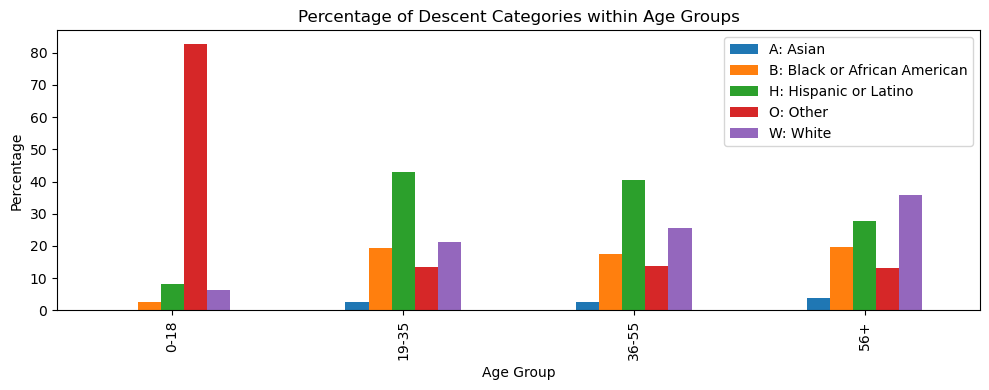

In [72]:
# plot only the percentages of descent categories within age groups as a bar chart
aggregated_age_descent_data[['vict_descent_A_percent', 'vict_descent_B_percent', 'vict_descent_H_percent', 'vict_descent_O_percent', 'vict_descent_W_percent']].plot(kind='bar',
                                                                                                                                                figsize=(10, 4))
plt.xlabel('Age Group')
plt.xticks(range(len(aggregated_age_descent_data)), labels)  # Set custom labels on the x-axis
plt.ylabel('Percentage')
plt.title('Percentage of Descent Categories within Age Groups')
plt.legend(['A: Asian', 'B: Black or African American', 'H: Hispanic or Latino', 'O: Other', 'W: White'])
#plt.legend(['A', 'B', 'H', 'O', 'W'])

plt.tight_layout()
plt.show()

- 'Hispanic or Latino' ('H') and 'White' ('W') categories show prominence across multiple age groups, with varying degrees of dominance depending on the age bracket.
- The 'Other' category ('O') is notably dominant among younger victims (0-18 age group), which might indicate a distinct reporting pattern or a diverse range of ethnicities within this age category.
- Across all age groups, the 'A: Asian' ethnic category consistently represents a minority among victims, with percentages ranging from 0.24% to 3.84%. Also, the 'A: Asian' ethnic category maintains a relatively consistent presence within the victim demographics across different age cohorts.

Limitation: One of the limitations here is that the dataset lacks categorization for individuals of mixed races, potentially leading to a misrepresentation of minority groups.

### ML Prediction

##### Background information: 
*Part 1 Crimes* are designated by the Federal Bureau of Investigation (FBI) as ten serious crimes that occur on a regular basis, have a uniformity of definition, large volume, and a high likelihood of being reported. Part 1 Crimes fall into two categories: violent crimes and property crimes.

### Prediction: Based on victims' age, sex and descent, how likely they would be involved in severe/Part 1 crimes?

In [73]:
df4 = df.copy()
df4.head(2)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545


In [74]:
grouped_unique_values = df4.groupby("part_1_2").crm_cd_desc.unique()
# Convert the Pandas Series to a list and print
for group_name, unique_values in grouped_unique_values.items():
    print(f"Group: {group_name}")
    print(unique_values[:10])  # Display the first 10 unique values for each group
    print("\n")

Group: 1
['RAPE, FORCIBLE' 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'BURGLARY FROM VEHICLE' 'ARSON' 'THEFT PLAIN - PETTY ($950 & UNDER)'
 'ROBBERY' 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' 'BURGLARY'
 'VEHICLE - STOLEN']


Group: 2
['BATTERY - SIMPLE ASSAULT' 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'OTHER MISCELLANEOUS CRIME' 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 'INTIMATE PARTNER - SIMPLE ASSAULT' 'THEFT OF IDENTITY'
 'BUNCO, GRAND THEFT' 'BATTERY WITH SEXUAL CONTACT']




In [75]:
dfml = df.copy().drop(columns = ['weapon_desc','dr_no','date_rptd','date_occ','time_occ','area','area_name','rpt_dist_no','crm_cd','crm_cd_desc','mocodes','premis_cd','premis_desc','weapon_used_cd','crm_cd_1','crm_cd_2','crm_cd_3','crm_cd_4','location','cross_street','lat','lon','status','status_desc'])
#dfml.weapon_desc.fillna(value='Unknown',inplace=True)
dfml.head()
# for 'vict_sex' column, replace nan, 'H', '-' with the letter 'others'
dfml['vict_sex'].fillna('others', inplace=True)
dfml['vict_sex'].replace({'H': 'others', '-': 'others'}, inplace=True)

# for 'Vict Descent' column, replace everything except 'B', 'W', 'H' and 'A' with the letter 'O'
# B: Black or African American, W: White, H: Hispanic or Latino, A: Asian, O: Other
def categorized_descent(descent):
    if descent in ['B', 'W', 'H', 'A']:
        return descent
    else:
        return 'O'
dfml['vict_descent'] = dfml['vict_descent'].apply(categorized_descent)

dfml.vict_sex.unique()
dfml.vict_descent.unique()

,part_1_2,vict_age,vict_sex,vict_descent
0,2,36,F,B
1,2,25,M,H
2,2,0,X,X
3,2,76,F,W
4,2,31,X,X


array(['F', 'M', 'X', 'others'], dtype=object)

array(['B', 'H', 'O', 'W', 'A'], dtype=object)

In [76]:
# generate partBin variable. 1 if part_1_2=1; 0 otherwise.
dfml['partBin'] = (dfml.part_1_2 ==1)+0.0
dfml.partBin.mean()

0.5860724957775757

In [77]:
# generate dummy variables for values in vict_sex,vict_descent
dfml1 = pd.get_dummies(dfml,columns=['vict_sex','vict_descent'])
dfml1.head()

,part_1_2,vict_age,partBin,vict_sex_F,vict_sex_M,vict_sex_X,vict_sex_others,vict_descent_A,vict_descent_B,vict_descent_H,vict_descent_O,vict_descent_W
0,2,36,0.0,1,0,0,0,0,1,0,0,0
1,2,25,0.0,0,1,0,0,0,0,1,0,0
2,2,0,0.0,0,0,1,0,0,0,0,1,0
3,2,76,0.0,1,0,0,0,0,0,0,0,1
4,2,31,0.0,0,0,1,0,0,0,0,1,0


In [78]:
# drop both 'partBin' and 'part_1_2' for X
X = dfml1.drop(['partBin','part_1_2'],axis=1)
# affairsBin is Y
Y = dfml1.partBin

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Split the data into 70% training set and 30% testing set
# Save X_train, X_test, Y_train, Y_test for future use
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [81]:
(len(X_train) + len(X_test)) == len(X)

True

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
cl = RandomForestClassifier(random_state = 0)
cl.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [84]:
# predict on the testing set (X_test)
cl.predict(X_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [85]:
# Accuracy
(cl.predict(X_test) == Y_test).mean()

0.647425081200335

In [86]:
y_pred = cl.predict(X_test)
#y_pred

In [87]:
# Get prediction outputs with probabilities of 1 only
y_pred_proba = cl.predict_proba(X_test)[:,1]
y_pred_proba

array([0.41505409, 0.54103708, 0.98368491, ..., 0.59964004, 0.51099378,
       0.58163687])

#### Prediction results as above, now getting the performance evaluated

In [88]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [89]:
# Get Confusion matrix using confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[ 41932,  59407],
       [ 26891, 116535]])

In [90]:
# Get Recall using recall_score
met.recall_score(Y_test,y_pred)

0.8125095868252618

In [91]:
#Get AUC score using roc_auc_score
met.roc_auc_score(Y_test,y_pred_proba)

0.6971145336996889

#### Recall score = ~81%; The AUC score = ~70%

## Step 4: Conclusion

### Finding 1 - Crime types & household income

Some of the crime types are positively correlated with household income. The correlation between burglary and household income is 57.7%. Take the Pacific as an example of an area with higher household income, burglaries mostly occurred between 12.00-13.00 (24%), and only 47% of burglaries were reported on the same day during the time when they got home from work.

#### Explaination and Suggestions:
The above findings constitute evidence that can help us better persuade policymakers to improve police presence in the Pacific district.
Specifically, we can suppress the amount of home break-ins by increasing police presence in residential areas during working hours (9AM to 5PM).



### Finding 2 - Crime in motel

When considering the location and household income, it’s interesting that the correlation between motel and household income is only -17%. It seems no matter where the motel is, it is dangerous by itself.

#### Explaination and Suggestions:
Interestingly and sadly, some physical abuse happens at motels. Looking up this data, we find that the place is called Mustang Motel, and it is a rentable by-hour love motel. Most of the incidents happen in the dead of night, between 12:00 AM and 2:00 AM, and in the morning, between 6:00 AM and 10:00 AM. In addition to the physical abuse by partners, there are also incidents of robbery, burglary, and human trafficking! Figueroa St. pops up as a clear winner. Upon researching why, we find that The Figueroa Corridor, also known as 'the track,' is the most notorious human trafficking & sex trafficking corridor in the United States.

Therefore, additional law enforcement resources should be deployed, including patrols and surveillance, during the identified high-risk hours between 12:00 AM and 2:00 AM, as well as in the morning between 6:00 AM and 10:00 AM. The local agencies should also engage with the management of Mustang Motel to discuss security measures, employee training, and cooperation in reporting suspicious activities. Motels can play a crucial role in deterring criminal behavior through enhanced security protocols.

### Finding 3 - Distribution of Victims

Victims who are identified with gender X at younger age 0-18 and females aged 19-35 are more vurnerable and targeted to be involved in crime, while the Asian ethnic category consistently represents a minority among victims.  A basic model to predict how likely victims would be involved in severe/Part 1 crimes based on their age, sex and descent was created and reached recall score 81%, AUC score 70%。

#### Explaination and Suggestions: 

1. The percentage of victims classified under gender 'X' (again meaning a gender that is not exclusively male nor female) is highest in the youngest age group (0-18) and diminishes significantly as age increases.
- Suggesttion to the local authority: Collaborate with advocacy groups, community organizations, and individuals representing gender-diverse communities to understand their specific needs and challenges. Engaging these groups can inform policymakers about effective strategies and policies that cater to diverse gender identities.
  
2. A concerning trend that might need targeted interventions to address the vulnerability or targeting of females aged 19-35. 
- Policymakers could possibly launch targeted awareness campaigns to educate women in this age group about potential risks and safety measures. Empower them with information on how to recognize and respond to situations that might pose a threat.

3. Asians have lowest reported cases in burglary incidents. Asians, who are around 12% of the local population (per the US Census Bureau), have the lowest burglary rates. Yet Black people, at 8%, have higher burglary rates compared to Asians. Moreover, across all age groups, the Asian ethnic category consistently represents a minority among victims, with percentages ranging from 0.24% to 3.84%.
- Suggestion to the local authority: Investigate the underlying causes contributing to higher burglary rates among certain racial groups such as the black population. This could involve understanding socioeconomic factors, community dynamics, and access to resources or security measures in different neighborhoods. 
- In addition, although Asians having the lowest reported crime rates, the reasons behind it could be varied. Therefore, for exmaple, it's crucial not to overlook the significance of providing language assistance at police stations. This could help reduce hesitancy in reporting among non-English speakers of minority communities.
   
4.  A basic model to predict how likely victims would be involved in severe/Part 1 crimes based on their age, sex and descent was created. Based on the recall score, the model is likely to identify 81% of victims who will be involved in severe/Part 1 crimes correctly. The AUC score is closed to 70% indicating an acceptable performing model that can distinguish between the classes across different thresholds. This is a good preliminary training model serveing as a foundation to build a more advanced and expansive model.
